In [259]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston

In [260]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [262]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [263]:
X = data[[ 'CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 36)

In [264]:
dtr = DecisionTreeRegressor(criterion ='mse', max_depth = 5) 

In [265]:
### Построим модель и график самого дерева
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)
mean_absolute_error(predictions, y_test)

2.917096437686742

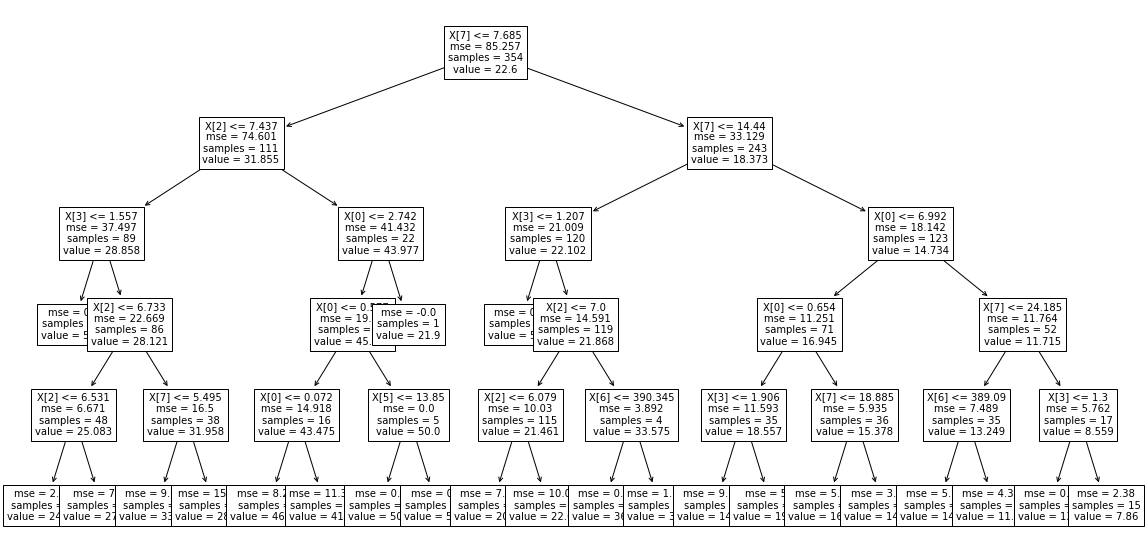

In [266]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10))
_ = tree.plot_tree(dtr, fontsize=10)

plt.show()

In [267]:
### Текстовый формат
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_7 <= 7.68
|   |--- feature_2 <= 7.44
|   |   |--- feature_3 <= 1.56
|   |   |   |--- value: [50.00]
|   |   |--- feature_3 >  1.56
|   |   |   |--- feature_2 <= 6.73
|   |   |   |   |--- feature_2 <= 6.53
|   |   |   |   |   |--- value: [24.02]
|   |   |   |   |--- feature_2 >  6.53
|   |   |   |   |   |--- value: [27.22]
|   |   |   |--- feature_2 >  6.73
|   |   |   |   |--- feature_7 <= 5.49
|   |   |   |   |   |--- value: [33.63]
|   |   |   |   |--- feature_7 >  5.49
|   |   |   |   |   |--- value: [28.75]
|   |--- feature_2 >  7.44
|   |   |--- feature_0 <= 2.74
|   |   |   |--- feature_0 <= 0.58
|   |   |   |   |--- feature_0 <= 0.07
|   |   |   |   |   |--- value: [46.28]
|   |   |   |   |--- feature_0 >  0.07
|   |   |   |   |   |--- value: [41.79]
|   |   |   |--- feature_0 >  0.58
|   |   |   |   |--- feature_5 <= 13.85
|   |   |   |   |   |--- value: [50.00]
|   |   |   |   |--- feature_5 >  13.85
|   |   |   |   |   |--- value: [50.00]
|   |   |--- feature_0 >

In [268]:
dtr.score(X_test, y_test)

0.802746683790768

In [269]:
### Попробуем поменять глубину дерева
for i in range (3, 10):
    dtree = DecisionTreeRegressor(criterion ='mse', max_depth = i) 
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    
    print(f" max_depth = {i}, MAE = {round(mean_absolute_error(predictions, y_test), 4)}")

 max_depth = 3, MAE = 3.3655
 max_depth = 4, MAE = 3.0524
 max_depth = 5, MAE = 2.9171
 max_depth = 6, MAE = 2.8982
 max_depth = 7, MAE = 2.874
 max_depth = 8, MAE = 2.9812
 max_depth = 9, MAE = 2.9138


In [270]:
### Сравним передыдущие значения со значениями для модели, использующий критерий
for i in range (3, 10):
    dtree = DecisionTreeRegressor(criterion ='mae', max_depth = i) 
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    
    print(f" max_depth = {i}, MAE = {round(mean_absolute_error(predictions, y_test), 4)}")

 max_depth = 3, MAE = 3.1645
 max_depth = 4, MAE = 3.2141
 max_depth = 5, MAE = 2.878
 max_depth = 6, MAE = 2.8961
 max_depth = 7, MAE = 3.1135
 max_depth = 8, MAE = 3.122
 max_depth = 9, MAE = 3.2461


In [271]:
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)
y_train.shape

(354,)